In [33]:
import pandas as pd
import numpy as np
import re

In [34]:
df = pd.read_csv('allocine_squidgame.csv')

In [35]:
df.head()

,Note,Description,Date,nombre_good,nombre_follow,key
0,"3,0","On s'attendait à une fin plus élaborée, claire...",Publiée le 2 octobre 2021,22\n\n\n10,Suivre son activité,0
1,"2,5",Encore une série très sur-côtée ! Tout est pré...,Publiée le 1 octobre 2021,24\n\n\n12,Suivre son activité,1
2,"4,5",Pas fan des séries coréennes en général. Je do...,Publiée le 22 septembre 2021,20\n\n\n21,Suivre son activité,2
3,"4,5","Disons le tout de suite, je suis fan depuis 30...",Publiée le 5 octobre 2021,9\n\n\n10,Suivre son activité,3
4,"4,0","Visuellement recherché, très ludique, rythmé e...",Publiée le 25 septembre 2021,7\n\n\n\n9,Suivre son activité,4


# Explo

In [36]:
df.shape

(341, 6)

In [37]:
df.dtypes

Note             object
Description      object
Date             object
nombre_good      object
nombre_follow    object
key               int64
dtype: object

In [38]:
df['Note'].value_counts()

5,0    72
4,0    61
4,5    46
3,5    46
0,5    26
3,0    24
2,0    22
2,5    19
1,0    15
1,5    10
Name: Note, dtype: int64

In [39]:
df['word_count'] = df["Description"].apply(lambda x: len(str(x).split(" ")))

df['char_count'] = df["Description"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

df['sentence_count'] = df["Description"].apply(lambda x: len(str(x).split(". ")))

df['avg_word_length'] = df['char_count'] / df['word_count']

df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']

# Cleaning

In [40]:
df.drop('nombre_follow', axis=1, inplace=True)
df.drop('key', axis=1, inplace=True)

In [41]:
df['good'] = df.nombre_good.apply(lambda x: re.split("\s+", x)[0])

df['bad'] = df.nombre_good.apply(lambda x: re.split("\s+", x)[1])

df.drop('nombre_good', axis=1, inplace=True)

In [42]:
df['Note'] = df['Note'].apply(lambda x: x.replace(',', '.'))
df['Note'] = df['Note'].astype(float)

In [43]:
import dateparser

In [44]:
df['Date'] = df['Date'].apply(lambda x: re.sub('Publiée le ', '', x))
df['Date'] = df.apply(lambda row: dateparser.parse(row['Date']), axis = 1)

/home/greg/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)


In [45]:
df.head()

,Note,Description,Date,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,good,bad
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,559,2696,14,4.822898,39.928571,22,10
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,89,409,3,4.595506,29.666667,24,12
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,30,156,4,5.200000,7.500000,20,21
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,136,667,6,4.904412,22.666667,9,10
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,30,170,2,5.666667,15.000000,7,9


# Tokenization

In [46]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/greg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/greg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
df['description_clean'] = df['Description'].copy()
df['description_clean'] = df['description_clean'].map(lambda x : re.sub('[,\.!?()"]', '', x))
df['description_clean'] = df['description_clean'].map(lambda x : re.sub('\d', '', x))

In [48]:
df['token'] = df.apply(lambda row : word_tokenize(str(row['description_clean'])), axis=1)

In [49]:
french_stopwords = set(stopwords.words('french'))

In [50]:
french_stopwords

{'ai',
 'aie',
 'aient',
 'aies',
 'ait',
 'as',
 'au',
 'aura',
 'aurai',
 'auraient',
 'aurais',
 'aurait',
 'auras',
 'aurez',
 'auriez',
 'aurions',
 'aurons',
 'auront',
 'aux',
 'avaient',
 'avais',
 'avait',
 'avec',
 'avez',
 'aviez',
 'avions',
 'avons',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'ayez',
 'ayons',
 'c',
 'ce',
 'ces',
 'd',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'es',
 'est',
 'et',
 'eu',
 'eue',
 'eues',
 'eurent',
 'eus',
 'eusse',
 'eussent',
 'eusses',
 'eussiez',
 'eussions',
 'eut',
 'eux',
 'eûmes',
 'eût',
 'eûtes',
 'furent',
 'fus',
 'fusse',
 'fussent',
 'fusses',
 'fussiez',
 'fussions',
 'fut',
 'fûmes',
 'fût',
 'fûtes',
 'il',
 'ils',
 'j',
 'je',
 'l',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'm',
 'ma',
 'mais',
 'me',
 'mes',
 'moi',
 'mon',
 'même',
 'n',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ont',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 's',
 'sa',
 'se',
 'sera',
 'serai',
 'seraient',
 'serais',
 'serait',


In [51]:
df['token'] = df['token'].apply(lambda x : [word for word in x if word not in french_stopwords])

In [52]:
df.head()

,Note,Description,Date,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,good,bad,description_clean,token
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,559,2696,14,4.822898,39.928571,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, fin, plus, élaborée, clairem..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,89,409,3,4.595506,29.666667,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, série, très, sur-côtée, Tout, prévisi..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,30,156,4,5.200000,7.500000,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, séries, coréennes, général, Je, doi..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,136,667,6,4.904412,22.666667,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, tout, suite, fan, depuis, ans, produc..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,30,170,2,5.666667,15.000000,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm..."


# Créer variable cible

In [53]:
df["Sentiment"] = df['Note'].apply(lambda x: 0 if x<4 else 1)

# Stemming

In [54]:
from nltk.stem import SnowballStemmer

In [55]:
stemmer = SnowballStemmer('french')
df['stemming'] = df.token.copy().apply(lambda x: [stemmer.stem(item) for item in x])

In [56]:
df.head()

,Note,Description,Date,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,good,bad,description_clean,token,Sentiment,stemming
0,3.0,"On s'attendait à une fin plus élaborée, claire...",2021-10-02,559,2696,14,4.822898,39.928571,22,10,On s'attendait à une fin plus élaborée clairem...,"[On, s'attendait, fin, plus, élaborée, clairem...",0,"[on, s'attend, fin, plus, élabor, clair, de, d..."
1,2.5,Encore une série très sur-côtée ! Tout est pré...,2021-10-01,89,409,3,4.595506,29.666667,24,12,Encore une série très sur-côtée Tout est prév...,"[Encore, série, très, sur-côtée, Tout, prévisi...",0,"[encor, ser, tres, sur-côt, tout, prévisibl, p..."
2,4.5,Pas fan des séries coréennes en général. Je do...,2021-09-22,30,156,4,5.200000,7.500000,20,21,Pas fan des séries coréennes en général Je doi...,"[Pas, fan, séries, coréennes, général, Je, doi...",1,"[pas, fan, ser, coréen, général, je, dois, avo..."
3,4.5,"Disons le tout de suite, je suis fan depuis 30...",2021-10-05,136,667,6,4.904412,22.666667,9,10,Disons le tout de suite je suis fan depuis an...,"[Disons, tout, suite, fan, depuis, ans, produc...",1,"[dison, tout, suit, fan, depuis, an, product, ..."
4,4.0,"Visuellement recherché, très ludique, rythmé e...",2021-09-25,30,170,2,5.666667,15.000000,7,9,Visuellement recherché très ludique rythmé et ...,"[Visuellement, recherché, très, ludique, rythm...",1,"[visuel, recherch, tres, ludiqu, rythm, galer,..."


# Train / Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(df['stemming'], df['Sentiment'], test_size=0.3, random_state=27)

In [58]:
y_train.shape

(238,)

In [59]:
y_train.value_counts()

1    124
0    114
Name: Sentiment, dtype: int64

In [60]:
y_test.value_counts()

1    55
0    48
Name: Sentiment, dtype: int64

# TF-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform([" ".join(words) for words in X_train])
labels_X_tfidf = tfidf_vectorizer.get_feature_names()

X_test_tfidf = tfidf_vectorizer.transform([" ".join(words) for words in X_test])

In [63]:
X_train_tfidf.shape

(238, 2961)

In [69]:
labels_X_tfidf.shape

AttributeError: 'list' object has no attribute 'shape'

In [70]:
df_tdidf_train = pd.DataFrame(data=X_train_tfidf.toarray(), columns=labels_X_tfidf)

In [71]:
df_tdidf_train.head()

,abandon,abattr,abim,abord,about,abri,abscon,absenc,absolu,absten,...,évident,évit,évolu,êre,êtr,être,île,œil,œuvr,œuvresc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_tdidf_train['Sentiment'].value_counts()

KeyError: 'Sentiment'

In [73]:
y_train

90     1
143    0
80     1
145    0
277    0
      ..
312    0
31     1
328    0
184    1
19     1
Name: Sentiment, Length: 238, dtype: int64

In [74]:
df_tdidf_train['sentiment'] = y_train

In [75]:
X_train_tfidf.shape

(238, 2961)

In [76]:
X_test_tfidf.shape

(103, 2961)

In [77]:
X_train_tfidf

<238x2961 sparse matrix of type '<class 'numpy.float64'>'
	with 12060 stored elements in Compressed Sparse Row format>

# Model

In [78]:
df_best_word = df_tdidf_train.groupby(['sentiment']).sum()

In [79]:
df_best_word_transposed = df_best_word.T

In [80]:
df_best_word_transposed.head()

sentiment,0.0,1.0
abandon,0.000000,0.118241
abattr,0.101425,0.000000
abim,0.000000,0.180492
abord,0.303216,0.250475
about,0.036896,0.000000


In [81]:
df_best_word_transposed.describe()

sentiment,0.0,1.0
count,2961.000000,2961.000000
mean,0.172145,0.184594
std,0.325319,0.374815
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.066609,0.084260
75%,0.210200,0.224360
max,5.266215,6.080413


In [82]:
word_neg = df_best_word_transposed.iloc[:,0].sort_values(ascending=False).head(150)

In [83]:
word_pos = df_best_word_transposed.iloc[:,1].sort_values(ascending=False).head(150)

In [84]:
word_tri = [word for word in word_neg.index if word not in word_pos.index]

In [85]:
X_test.head()

195    [pas, déplais, regard, d'énorm, ficel, scénari...
236    [j'ai, pass, bon, moment, dev, squid, gam, déc...
21     [décor, imag, sublim, melang, battl, royal, se...
325    [on, a, toujour, droit, sempiternel, pseudo-ex...
216    [malgr, l'engou, international, cet, ser, trou...
Name: stemming, dtype: object

In [86]:
y_test_predict = X_test.apply(lambda x: 0 if any(e in x for e in word_tri) else 1)

In [87]:
y_test_predict

195    0
236    0
21     0
325    0
216    1
      ..
29     0
260    0
252    0
208    0
226    1
Name: stemming, Length: 103, dtype: int64

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test, y_test_predict)

array([[45,  3],
       [45, 10]])

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

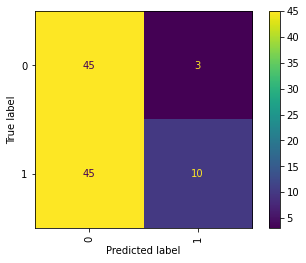

In [91]:
cm = confusion_matrix(y_test, y_test_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(xticks_rotation='vertical')

plt.show()

---

# Naive Bayes

* Suppression stopwords
* Tokenization des phrases
* Lemmatisation des tokens
* Separation des données en tain / test
* CountVectorizer
* Appliquer modele BernouilliNB
* Matrice de confusion